## Optimize evaluation parameters for custom model

Predicting with Cellpose is not trivial.  Still need to consider parameters such as ```diameter```, ```bsize```, ```niter```, ```channels```, ```cellprob_threshold```, and ```flow_threshold```


In [1]:
import napari
viewer = napari.Viewer()

from cellpose import models, io
import os
import numpy as np
from skimage.io import imread
from tnia.plotting.plt_helper import imshow_multi2d, random_label_cmap
from matplotlib import pyplot as plt
from tnia.deeplearning.dl_helper import quantile_normalization, get_label_paths

raster_geometry not imported.  This is only needed for the ellipsoid rendering in apply_stardist


In [2]:
parent_path =r'D:\images\tnia-python-images\\imagesc\\2024_12_19_sem_grain_size_revisit'
parent_path =r'/home/bnorthan/images/tnia-python-images/imagesc/2024_12_19_sem_grain_size_revisit'
model_path = os.path.join(parent_path, 'models')
model_name = 'cellpose_20241219_090937'

model = models.CellposeModel(gpu=True, model_type=None, pretrained_model= os.path.join(model_path, model_name))

/home/bnorthan/mambaforge/envs/easy_augment_pytorch/lib/python3.12/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = tor

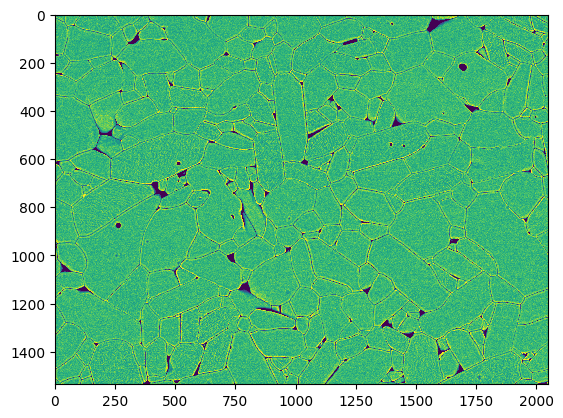

In [3]:
im_name = '211122_AM_Al2O3_SE_021.ome.tiff'
#im_name = '211122_AM_Al2O3_SE_027_sp.tif'
#im_name = r'Zeiss-Pub/Zeiss-Pub.png'
im = imread(os.path.join(parent_path, im_name))
im = quantile_normalization(im, channels=True)
plt.imshow(im)

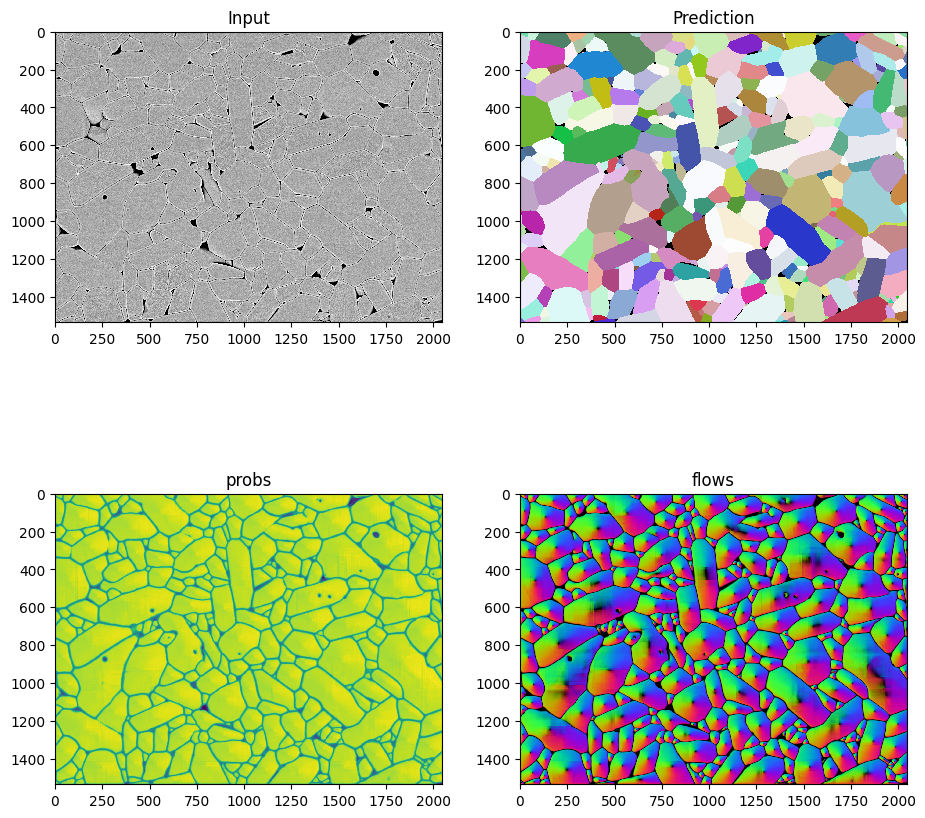

In [4]:
masks= model.eval(im, diameter=30, bsize=512, niter=2000, channels=[0,0], cellprob_threshold=-1.0, flow_threshold=4)
colormaps = ['gray', random_label_cmap(), 'viridis', 'gray']
fig = imshow_multi2d([im, masks[0], masks[1][2], masks[1][0]], ['Input', 'Prediction', 'probs', 'flows'], 2, 2, colormaps=colormaps, width=11, height=11)

In [13]:
from skimage.io import imsave
imsave(os.path.join(parent_path, "custom_SE_27.tif"), masks[0])

C:\Users\bnort\AppData\Local\Temp\ipykernel_3612\332070099.py:2: UserWarning: D:\images\tnia-python-images\\imagesc\\2024_12_19_sem_grain_size_revisit\custom_SE_27.tif is a low contrast image
  imsave(os.path.join(parent_path, "custom_SE_27.tif"), masks[0])


In [5]:
viewer.add_image(im, name='image')
viewer.add_labels(masks[0], name='predicted labels')
viewer.add_image(masks[1][2], name='probs')
viewer.add_image(masks[1][0], name='flows')

<Image layer 'flows' at 0x78e3e18f00e0>